In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('the_fan_output.csv', dtype = object)

In [61]:
df

,ID,DATE,INCIDENT_TIME,OFFENSE_NUMBER,OFFENSE_CODE,OFFENSE_CODE_DESC,OFFENSE_RESTRICTED_INDICATOR,ATTEMPTED_CRIME_FLG_DESC,INCIDENT_BUILDING_NUMBER,INCIDENT_BUILDING_SUFFIX,...,VEHICLE_COLOR_DESC_1,VEHICLE_COLOR_DESC_2,VEHICLE_STOLEN_VALUE,VEHICLE_RECOVERY_VALUE,VEHICLE_RECOVERY_DATE,VEHICLE_RECOVERY_BUILDING_NO,VEHICLE_RECOVERY_STREET_DIR,VEHICLE_RECOVERY_STREET_NAME,VEHICLE_RECOVERY_CITY,VEHICLE_RECOVERY_STATE
0,21004,2000-01-01,09:45,1,90ZC,HIT AND RUN,N,NaN,1XX,NaN,...,GREY,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,49816,2000-01-01,20:43,1,9811,PROMISCUOUS SHOOTING,N,NaN,26XX,NaN,...,SILVER,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,43174,2000-01-01,00:00,1,290B,DESTRUCTION PROPERTY/PRIVATE PROPERTY,N,NaN,6XX,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,30754,2000-01-01,09:45,1,90ZC,HIT AND RUN,N,NaN,1XX,NaN,...,GREY,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2216,2000-01-01,02:00,1,13B1,SIMPLE ASSAULT,N,NaN,5XX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22939,2000-01-01,20:43,1,9811,PROMISCUOUS SHOOTING,N,NaN,26XX,NaN,...,DARK,BLUE ERED,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
6,41540,2000-01-01,19:30,1,220A,BURGLARY/B&E/RESIDENTIAL,N,NaN,21XX,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
7,43450,2000-01-01,17:00,1,23F,THEFT FROM MOTOR VEHICLE,N,NaN,12XX,1/2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
8,28427,2000-01-01,17:00,1,23F,THEFT FROM MOTOR VEHICLE,N,NaN,12XX,1/2,...,GREEN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
9,7979,2000-01-01,15:00,1,23H,ALL OTHER LARCENY,N,NaN,16XX,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [66]:
# df['DATE'] = df['DATE'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)

In [67]:
df['OFFENSE_CODE_DESC'].value_counts()

DESTRUCTION PROPERTY/PRIVATE PROPERTY        7826
HIT AND RUN                                  7566
THEFT FROM MOTOR VEHICLE                     6472
BURGLARY/B&E/RESIDENTIAL                     4137
ALL OTHER LARCENY                            2943
THEFT FROM BUILDING                          2868
MOTOR VEHICLE THEFT                          2745
SIMPLE ASSAULT                               1953
SHOPLIFTING                                  1577
DRUG/NARCOTIC VIOLATION                      1340
DESTRUCTION PROPERTY/PRIVATE/GRAFFITI        1232
THEFT OF MOTOR VEHICLE PARTS/ACCESSORIES      999
ROBBERY/INDIVIDUAL                            985
SUSPICIOUS SITUATION/PERSON                   934
BURGLARY/B&E/COMMERCIAL                       809
DRUNKENNESS                                   780
ALL OTHER OFFENSES                            779
BAD CHECKS                                    706
DUI, ALCOHOL                                  658
LOST / MISSING / SUSPICIOUS PROPERTY          599


In [77]:
def plot_crime_type(offense_code_desc, freq='M'):
    df_temp = df[df['OFFENSE_CODE_DESC'] == offense_code_desc]

    # pull out only date and offense code
    df_temp = df_temp[['DATE']]
    df_temp = df_temp.dropna()
    df_temp['OCCURENCE'] = 1

    g = df_temp.groupby(pd.Grouper(key='DATE', freq='M'))

    totals = g.sum()

    plt.title(offense_code_desc)
    plt.ylabel('Occurrences Per Month')
    plt.xlabel('Year')
    plt.plot(totals)

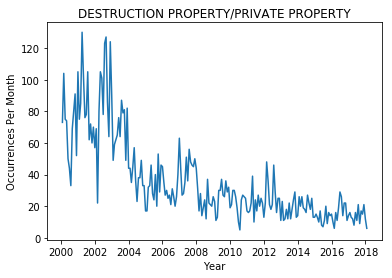

In [78]:
# TOP 10:
plot_crime_type('DESTRUCTION PROPERTY/PRIVATE PROPERTY')

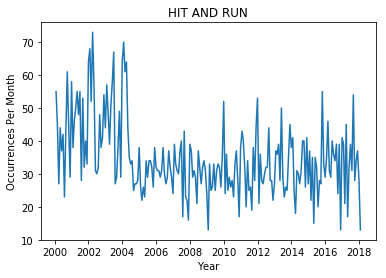

In [80]:
plot_crime_type('HIT AND RUN')

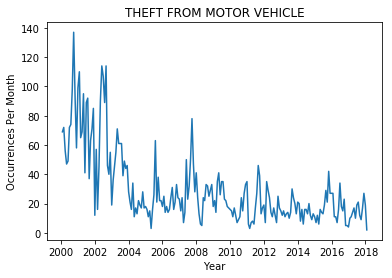

In [81]:
plot_crime_type('THEFT FROM MOTOR VEHICLE')

In [ ]:
# # HIT AND RUN                                  7566
# THEFT FROM MOTOR VEHICLE                     6472
plot_crime_type('BURGLARY/B&E/RESIDENTIAL')
# ALL OTHER LARCENY                            2943
# THEFT FROM BUILDING                          2868
# MOTOR VEHICLE THEFT                          2745
# SIMPLE ASSAULT                               1953
# SHOPLIFTING                                  1577
# DRUG/NARCOTIC VIOLATION                      1340
# DESTRUCTION PROPERTY/PRIVATE/GRAFFITI        1232